In [4]:
import os
os.getcwd()
os.chdir('c:/Users/Mario Vishal/Desktop/Data sets')
os.getcwd()

'c:\\Users\\Mario Vishal\\Desktop\\Data sets'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [9]:
data1=pd.read_csv('train_data.csv')
data1.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [10]:
data=data1.iloc[:10000,:]

#from the above data total 24 features and 100000 observations are present
and the output variable is "click" in this data set ,as it 0s and 1s it is a type of classification problem.

#EDA 

In [43]:
data.tail()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
9995,0,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,17654,300,250,1994,2,39,100083,33
9996,1,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,15701,320,50,1722,0,35,-1,79
9997,1,1005,1,5ee41ff2,17d996e6,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,16920,320,50,1899,0,431,-1,117
9998,0,1005,0,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,0f2161f8,a99f214a,...,1,0,21611,320,50,2480,3,297,100111,61
9999,0,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,18945,320,50,2153,3,427,100063,61


In [13]:
data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [14]:
data.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+04,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.795641e+18,0.170600,14102100.0,1005.059900,0.195900,1.068200,0.204500,17711.693800,318.478000,56.986400,1967.605900,0.789500,125.622400,37746.299500,88.260300
std,2.853038e+18,0.376178,0.0,1.103193,0.404895,0.601984,0.646469,3139.296362,11.492429,37.425508,385.160315,1.228878,234.039047,48516.401341,45.153569
min,1.004777e+16,0.000000,14102100.0,1001.000000,0.000000,0.000000,0.000000,375.000000,216.000000,36.000000,112.000000,0.000000,35.000000,-1.000000,13.000000
25%,1.024754e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,15704.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.063018e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,17654.000000,320.000000,50.000000,1993.000000,0.000000,35.000000,-1.000000,79.000000
75%,1.100749e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,20362.000000,320.000000,50.000000,2307.000000,2.000000,39.000000,100083.000000,117.000000
max,1.138513e+19,1.000000,14102100.0,1010.000000,5.000000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


In [15]:
data['click'].mean()

0.1706

In [16]:
data.corr()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
id,1.000000,0.005137,NaN,-0.004291,-0.010456,0.000488,0.000588,0.011745,-0.002437,0.004782,0.012280,-0.001541,0.003817,0.002947,-0.010200
click,0.005137,1.000000,NaN,-0.051617,0.025473,-0.054034,-0.030382,-0.087630,-0.061522,0.139553,-0.081150,0.035721,0.065797,-0.015000,-0.151854
hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1,-0.004291,-0.051617,NaN,1.000000,0.367787,0.966383,0.116743,0.127260,0.052628,-0.009144,0.134909,0.095982,-0.057215,-0.078781,0.112773
banner_pos,-0.010456,0.025473,NaN,0.367787,1.000000,0.381344,0.050581,0.139898,-0.058082,-0.095423,0.131165,0.171325,0.309933,0.009787,-0.026711
device_type,0.000488,-0.054034,NaN,0.966383,0.381344,1.000000,0.106015,0.163287,0.056523,-0.020130,0.175760,0.163658,-0.054398,-0.063507,0.112441
device_conn_type,0.000588,-0.030382,NaN,0.116743,0.050581,0.106015,1.000000,0.002294,0.051213,-0.014208,-0.007743,0.009501,-0.025278,0.011127,0.077320
C14,0.011745,-0.087630,NaN,0.127260,0.139898,0.163287,0.002294,1.000000,-0.071252,0.054249,0.976833,0.139157,0.110566,-0.018561,0.390622
C15,-0.002437,-0.061522,NaN,0.052628,-0.058082,0.056523,0.051213,-0.071252,1.000000,-0.264611,-0.084087,-0.022744,0.057104,0.022833,-0.023300
C16,0.004782,0.139553,NaN,-0.009144,-0.095423,-0.020130,-0.014208,0.054249,-0.264611,1.000000,0.071555,0.192700,-0.044714,-0.004884,-0.229625


In [17]:
data['device_type'].value_counts()

1    9273
0     381
4     321
5      25
Name: device_type, dtype: int64

In [18]:
import seaborn as sns

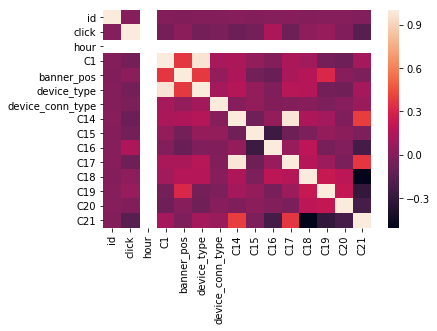

In [19]:
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [20]:
data.drop(columns=['hour'],inplace=True)

F:\anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
device_type_table=pd.crosstab(index=data['device_type'],columns=data['click'])
device_type_table


click,0,1
device_type,,
0,303,78
1,7669,1604
4,297,24
5,25,0


In [15]:
#from the above we can see that device 1 has more ctr
data['click'].mean()


0.1706

In [16]:
#this means only 17% of the ads are clicked and remaining 83% are un-clicked.

In [17]:
data.corr()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
id,1.000000,0.005137,-0.004291,-0.010456,0.000488,0.000588,0.011745,-0.002437,0.004782,0.012280,-0.001541,0.003817,0.002947,-0.010200
click,0.005137,1.000000,-0.051617,0.025473,-0.054034,-0.030382,-0.087630,-0.061522,0.139553,-0.081150,0.035721,0.065797,-0.015000,-0.151854
C1,-0.004291,-0.051617,1.000000,0.367787,0.966383,0.116743,0.127260,0.052628,-0.009144,0.134909,0.095982,-0.057215,-0.078781,0.112773
banner_pos,-0.010456,0.025473,0.367787,1.000000,0.381344,0.050581,0.139898,-0.058082,-0.095423,0.131165,0.171325,0.309933,0.009787,-0.026711
device_type,0.000488,-0.054034,0.966383,0.381344,1.000000,0.106015,0.163287,0.056523,-0.020130,0.175760,0.163658,-0.054398,-0.063507,0.112441
device_conn_type,0.000588,-0.030382,0.116743,0.050581,0.106015,1.000000,0.002294,0.051213,-0.014208,-0.007743,0.009501,-0.025278,0.011127,0.077320
C14,0.011745,-0.087630,0.127260,0.139898,0.163287,0.002294,1.000000,-0.071252,0.054249,0.976833,0.139157,0.110566,-0.018561,0.390622
C15,-0.002437,-0.061522,0.052628,-0.058082,0.056523,0.051213,-0.071252,1.000000,-0.264611,-0.084087,-0.022744,0.057104,0.022833,-0.023300
C16,0.004782,0.139553,-0.009144,-0.095423,-0.020130,-0.014208,0.054249,-0.264611,1.000000,0.071555,0.192700,-0.044714,-0.004884,-0.229625
C17,0.012280,-0.081150,0.134909,0.131165,0.175760,-0.007743,0.976833,-0.084087,0.071555,1.000000,0.166738,0.078131,-0.036728,0.367974


In [22]:
#as there are 4 unique values for the device type may the perspective of clicking the ads,may change via device

From the correlation we assess that highest positive correlation exists between c1 and banner_pos.
And c16 has some weak positive correlation with the click target variable.

In [24]:
data.isnull().sum()

id                  0
click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [25]:
data.dtypes

id                  float64
click                 int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object

In [26]:

data.head()

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,1,0,18993,320,50,2161,0,35,-1,157


In [12]:
data['C16'].value_counts()

50     9568
250     348
36       79
480       3
90        2
Name: C16, dtype: int64

In [13]:
data['C21'].value_counts()

79     3908
157    2393
23      736
61      685
33      477
117     393
32      332
48      287
52      128
46      109
156      91
91       77
16       71
13       62
95       51
71       49
15       42
101      31
42       17
93       13
100      12
82       11
111       9
94        6
116       4
70        3
85        1
68        1
20        1
Name: C21, dtype: int64

In [15]:
data['C1'].value_counts()

1005    9256
1002     381
1010     346
1007      11
1001       4
1008       2
Name: C1, dtype: int64

In [27]:
data.drop(columns=['id'],inplace=True)


F:\anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,2,15706,320,50,1722,0,35,-1,79
1,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,15704,320,50,1722,0,35,100084,79
2,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,15704,320,50,1722,0,35,100084,79
3,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,15706,320,50,1722,0,35,100084,79
4,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,18993,320,50,2161,0,35,-1,157


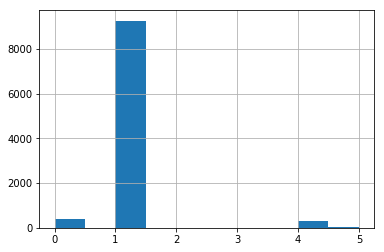

In [29]:
data['device_type'].hist(bins=10)

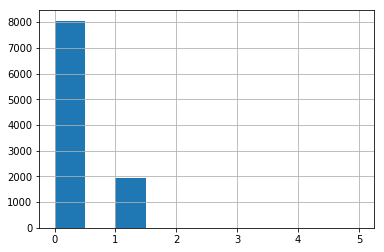

In [41]:
data.banner_pos.hist(bins=10)


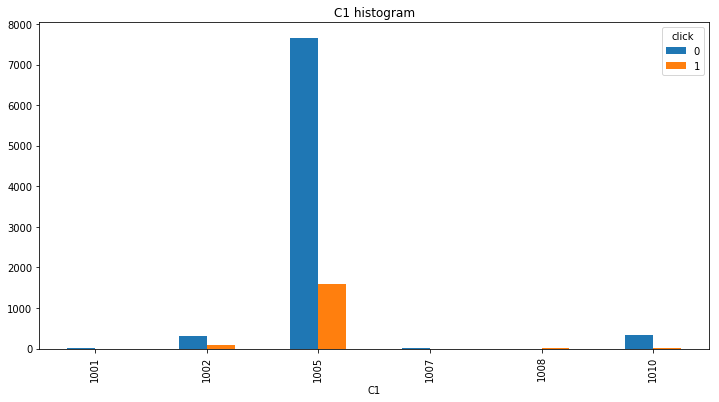

In [48]:
data.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

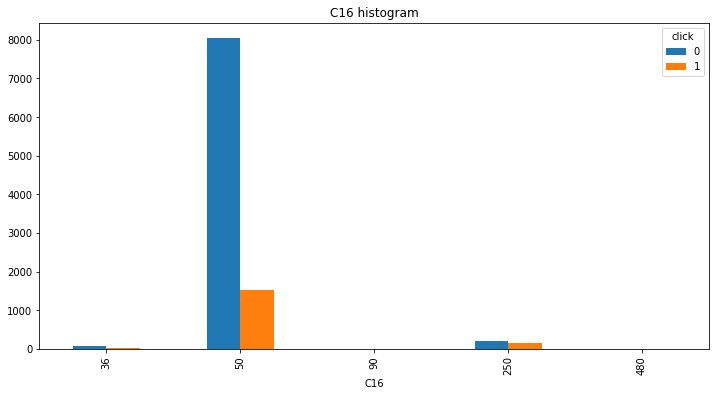

In [51]:
data.groupby(['C16', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C16 histogram');

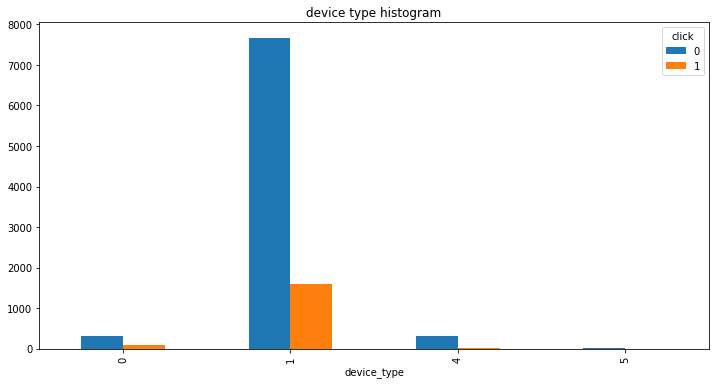

In [53]:
data.groupby(['device_type', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='device type histogram');

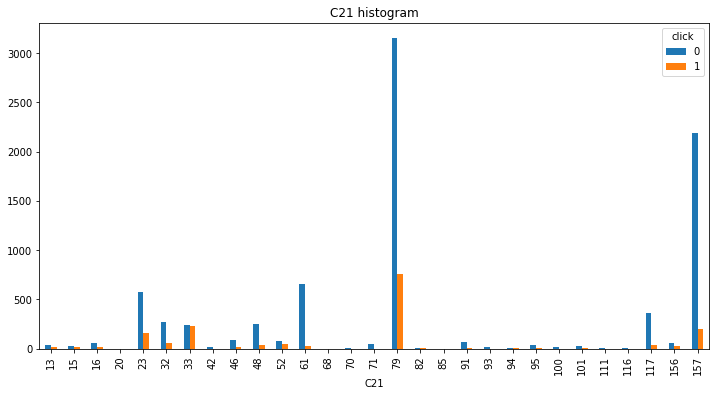

In [54]:
data.groupby(['C21', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C21 histogram');

In [36]:
x=data[['C1','banner_pos','C16','C21','device_type']]
x.head()

,C1,banner_pos,C16,C21,device_type
0,1005,0,50,79,1
1,1005,0,50,79,1
2,1005,0,50,79,1
3,1005,0,50,79,1
4,1005,1,50,157,1


In [37]:
y=data.iloc[;,0]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: click, dtype: int64

In [38]:
#normalising the input variables using minmax scaler preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.44444444, 0.        , 0.03153153, 0.45833333, 0.2       ],
       [0.44444444, 0.        , 0.03153153, 0.45833333, 0.2       ],
       [0.44444444, 0.        , 0.03153153, 0.45833333, 0.2       ],
       ...,
       [0.44444444, 0.2       , 0.03153153, 0.72222222, 0.2       ],
       [0.44444444, 0.        , 0.03153153, 0.33333333, 0.2       ],
       [0.44444444, 0.        , 0.03153153, 0.33333333, 0.2       ]])

In [39]:
from sklearn import model_selection, neighbors
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
x_train.head()

,C1,banner_pos,C16,C21,device_type
7488,1005,0,50,95,1
7348,1005,0,50,79,1
1961,1005,1,50,48,1
9599,1005,0,50,91,1
9351,1005,0,50,79,1


In [41]:
y_train.head()

7488    0
7348    0
1961    0
9599    0
9351    0
Name: click, dtype: int64

# Logistic Regression

In [42]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [43]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [44]:
#Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_acc = cross_val_score(lr, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, x_train_std, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

In [45]:
lr_acc

array([0.82721139, 0.82783196, 0.82783196])

In [46]:
#Predict on test data
y_pred=lr.predict(x_test)

In [47]:
print("Actual click values : ")
print(y_test.values)

Actual click values : 
[0 0 0 ... 0 0 1]


In [48]:
print("\nPredicted click values : ")
print(y_pred)


Predicted click values : 
[0 0 0 ... 0 0 0]


In [49]:
#Accuracy score on Test and Train set
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred))


Accuracy score: 83.600000
Recall score : 0.000000
ROC score : 50.000000

[[1672    0]
 [ 328    0]]


# Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, x_train_std, y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]

In [52]:
y_pred=dtc_clf.predict(x_test)

In [53]:
print("Actual click values : ")
print(y_test.values)

Actual click values : 
[0 0 0 ... 0 0 1]


In [54]:
print("\nPredicted click values : ")
print(y_pred)


Predicted click values : 
[0 0 0 ... 0 0 0]


In [55]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 83.500000
Recall score : 0.000000
ROC score : 49.940191

[[1670    2]
 [ 328    0]]


In [56]:
dtc_clf_acc

array([0.82683658, 0.82258065, 0.82333083])

# Random Forest Classifier

In [57]:
##Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=5, random_state=0) #max_depth should be moderate i.e minimum 3
rmf_clf = rmf.fit(x_train, y_train)

F:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [58]:
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rmf_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, x_train_std, y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]

In [59]:
rmf_clf_acc

array([0.82758621, 0.82820705, 0.82783196])

In [60]:
y_pred=lr.predict(x_test)

In [61]:
print(y_test.values)

[0 0 0 ... 0 0 1]


In [62]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [63]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 83.600000
Recall score : 0.000000
ROC score : 50.000000

[[1672    0]
 [ 328    0]]


# Support vector Machine

In [64]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(x_train,y_train)

In [65]:
#Print cross validation score for SVC
svc_acc = cross_val_score(svc_classifier, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, x_train_std, y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

In [66]:

y_pred=svc_classifier.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 83.600000
Recall score : 0.000000
ROC score : 50.000000

[[1672    0]
 [ 328    0]]


# Naive bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
nb_classifier =GaussianNB()
nb_classifier.fit(x_train, y_train)
nb_acc = cross_val_score(nb_classifier, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
nb_proba = cross_val_predict(nb_classifier, x_train_std, y_train, cv=3, method='predict_proba')
nb_scores = nb_proba[:, 1]

In [69]:
y_pred=nb_classifier.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred))


Accuracy score: 82.950000
Recall score : 9.146341
ROC score : 53.287286

[[1629   43]
 [ 298   30]]


# KNN

In [71]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
y_pred=clf.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 81.100000
Recall score : 13.414634
ROC score : 53.896312

[[1578   94]
 [ 284   44]]


In [74]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

In [79]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [80]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [81]:
#Print cross validation score for kNN
clf_acc = cross_val_score(clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)

In [82]:
clf_proba = cross_val_predict(clf, x_train_std, y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] # get the score of the positive class

In [83]:
clf_acc

array([0.81634183, 0.81057764, 0.5963991 ])

AUC Score (kNN): 0.60 


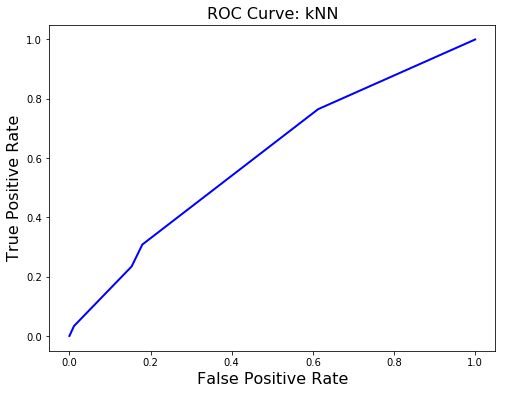

AUC Score (Logistic Regression): 0.61 


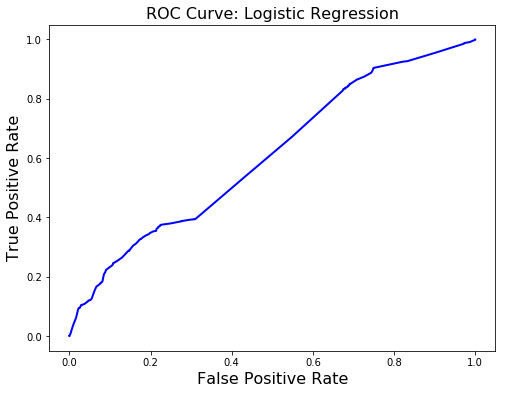

AUC Score (Naive Bayes): 0.61 


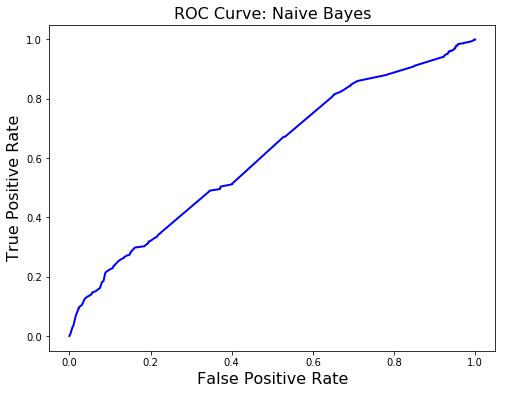

AUC Score (Support Vector Classification): 0.56 


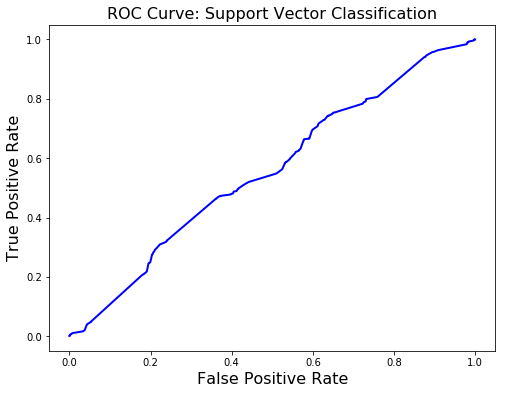

AUC Score (Decision Tree Classifier): 0.67 


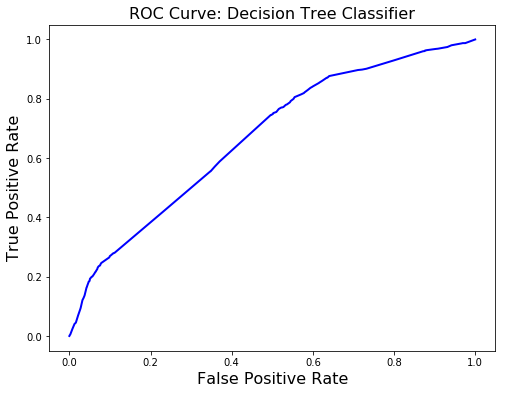

AUC Score (Random Forest Classifier): 0.65 


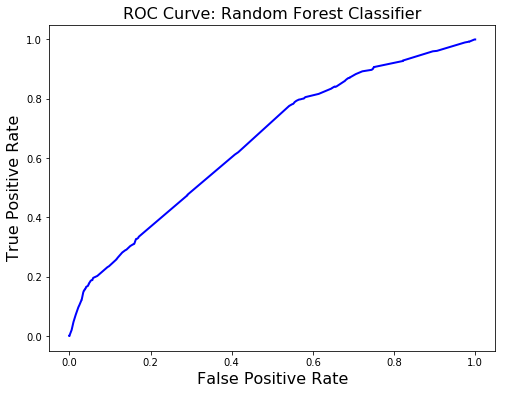

In [84]:
ROC_curve('kNN', y_train, clf_scores)
ROC_curve('Logistic Regression', y_train, lr_scores)
ROC_curve('Naive Bayes',y_train,nb_scores)
ROC_curve('Support Vector Classification',y_train,svc_scores)
ROC_curve('Decision Tree Classifier',y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',y_train,rmf_clf_scores)

In [ ]:
#